In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.transform import Rotation as r

In [32]:
def sph2cart(phi, theta, T):
    """ Convert from spherical/polar (phi, thetha) to cartesian
    coordinates.

    Parameters
    ----------
    phi : int or float between 0 and 90
        angle respect to the c-axis
    theta : int or float between 0 and 360
        angle respect to the a-axis
    T : int or float
        the magnitud of the vector (rho) in polar coordinates

    Returns
    -------
    numpy ndarrays (1d)
        three numpy 1d arrays with the x, y, and z coordinates
    """
    
    x = T * np.sin(np.deg2rad(phi)) * np.cos(np.deg2rad(theta))
    y = T * np.sin(np.deg2rad(phi)) * np.sin(np.deg2rad(theta))
    z = T * np.round(np.cos(np.deg2rad(phi), decimals=6))
    
    return x, y, z


def Tvalues(trans, phi, theta):
    """ Calculates the transmission value for any direction in polar
    coordinates using the equation (5) of Asimov et al. (2006) for a
    especific wavelength ignoring the sample thickness (i.e. =1).

    Parameters
    ----------
    trans : a tuple of size 3
        tuple containeing the transmission values along a-axis (Ta),
        b-axis (Tb), and c-axis (Tc). -> (Ta, Tb, Tc)
    phi : int or float between 0 and 90
        angle respect to the c-axis
    theta : int or float between 0 and 360
        angle respect to the a-axis

    Returns
    -------
    numpy array
        the calculated T values for any given orientation
    """

    # extract Tx values
    Ta, Tb, Tc = trans
    
    return Ta * np.cos(np.deg2rad(theta))**2 * np.sin(np.deg2rad(phi))**2 + \
           Tb * np.sin(np.deg2rad(theta))**2 * np.sin(np.deg2rad(phi))**2 + \
           Tc * np.cos(np.deg2rad(phi))**2

Para que las medidas de T estén sobre el plano tiene que cumplirse que z=0 en la función ``sph2cart()´´ y por tanto

$$cos(phi)^2 = 0$$

que se cumple cuando $\phi = 90$

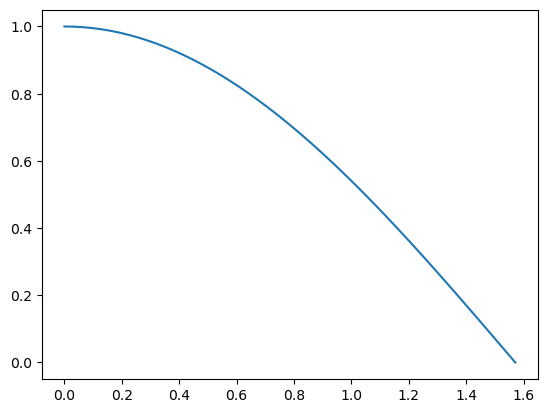

In [9]:
vals = np.linspace(0, np.deg2rad(90))
plt.plot(vals, np.cos(vals))

Necesitaremos usar la función round para obtener 0 (floating-point arithmetic arithmetics!). Razón:

In [30]:
print(np.cos(np.deg2rad(90)), 'vs', np.round(np.cos(np.deg2rad(90)), decimals=6))

6.123233995736766e-17 vs 0.0


In [ ]:
# generate spherical/polar coordinates
theta = np.linspace(0, 2*np.pi, 100)
phi = np.full_like(theta, fill_value=90)